#   E-Commerce (Amazon) Sentiment Analysis

In [1]:
### Importing necessary libraries:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
from bs4 import BeautifulSoup
import requests
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.patches as mpatches
import string
import re
from string import punctuation
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.naive_bayes import MultinomialNB
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import auc
from sklearn.svm import SVC
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import xgboost as xgb
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from tensorflow.keras.layers import LSTM, Dense, Embedding, SpatialDropout1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier, KerasRegressor
from sklearn.datasets import load_iris
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.decomposition import NMF
import warnings
warnings.filterwarnings('ignore') 

# Loading Cleaned Datasets

In [2]:
train_data = pd.read_csv(r'C:\Users\HP\Desktop\Digi-crome\Final_Capstone_Project\Data\cleaned_train_data.csv')
test_data = pd.read_csv(r'C:\Users\HP\Desktop\Digi-crome\Final_Capstone_Project\Data\cleaned_test_data.csv')
test_hidden_data = pd.read_csv(r'C:\Users\HP\Desktop\Digi-crome\Final_Capstone_Project\Data\cleaned_test_hidden_data.csv')

In [3]:
# Get the Shape of all datasets in one frame
train_data.shape, test_data.shape, test_hidden_data.shape

((3932, 11), (994, 10), (994, 11))

In [4]:
# Get Datasets features in one frame
train_data.columns , test_data.columns , test_hidden_data.columns

(Index(['Name of the product', 'Product Brand', 'categories',
        'primaryCategories', 'reviews_date', 'reviews_text', 'reviews_title',
        'sentiment', 'reviews_day', 'reviews_month', 'reviews_year'],
       dtype='object'),
 Index(['Name of the product', 'Product Brand', 'categories',
        'primaryCategories', 'reviews_date', 'reviews_text', 'reviews_title',
        'reviews_day', 'reviews_month', 'reviews_year'],
       dtype='object'),
 Index(['Name of the product', 'Product Brand', 'categories',
        'primaryCategories', 'reviews_date', 'reviews_text', 'reviews_title',
        'sentiment', 'reviews_day', 'reviews_month', 'reviews_year'],
       dtype='object'))

In [5]:
# Get the columns_values
train_data.count()

Name of the product    3932
Product Brand          3932
categories             3932
primaryCategories      3932
reviews_date           3932
reviews_text           3932
reviews_title          3878
sentiment              3932
reviews_day            3932
reviews_month          3932
reviews_year           3932
dtype: int64

In [6]:
# Get the columns_values
test_data.count()

Name of the product    994
Product Brand          994
categories             994
primaryCategories      994
reviews_date           994
reviews_text           994
reviews_title          984
reviews_day            994
reviews_month          994
reviews_year           994
dtype: int64

In [7]:
# Get the columns_values
test_hidden_data.count()

Name of the product    994
Product Brand          994
categories             994
primaryCategories      994
reviews_date           994
reviews_text           994
reviews_title          984
sentiment              994
reviews_day            994
reviews_month          994
reviews_year           994
dtype: int64

In [8]:
train_data.describe()

,reviews_day,reviews_month,reviews_year
count,3932.000000,3932.000000,3932.000000
mean,15.758138,6.003815,2016.854781
std,8.607425,4.386473,0.674061
min,1.000000,1.000000,2014.000000
25%,8.000000,2.000000,2016.000000
50%,16.000000,5.000000,2017.000000
75%,23.000000,11.000000,2017.000000
max,31.000000,12.000000,2018.000000


# Week 1 & 2: Class Imbalance Problem

##  Exploratory Data Analysis (EDA):

In [9]:
train_data.head()

,Name of the product,Product Brand,categories,primaryCategories,reviews_date,reviews_text,reviews_title,sentiment,reviews_day,reviews_month,reviews_year
0,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2016-12-26,purchased black fridaypros great price even sa...,powerful tablet,Positive,26,12,2016
1,Amazon - Echo Plus w/ Built-In Hub - Silver,Amazon,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware",2018-01-17,purchased amazon echo plus dot plus four fire ...,amazon echo plus awesome,Positive,17,1,2018
2,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Amazon Echo,Virtual Assistant Speakers,Electro...","Electronics,Hardware",2017-12-20,just average alexa option doe show thing scree...,average,Neutral,20,12,2017
3,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...",Amazon,"eBook Readers,Fire Tablets,Electronics Feature...","Office Supplies,Electronics",2017-08-04,very good product exactly what wanted very goo...,greattttttt,Positive,4,8,2017
4,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-01-23,this purchased bought niece other case compare...,very durable,Positive,23,1,2017


In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3932 entries, 0 to 3931
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Name of the product  3932 non-null   object
 1   Product Brand        3932 non-null   object
 2   categories           3932 non-null   object
 3   primaryCategories    3932 non-null   object
 4   reviews_date         3932 non-null   object
 5   reviews_text         3932 non-null   object
 6   reviews_title        3878 non-null   object
 7   sentiment            3932 non-null   object
 8   reviews_day          3932 non-null   int64 
 9   reviews_month        3932 non-null   int64 
 10  reviews_year         3932 non-null   int64 
dtypes: int64(3), object(8)
memory usage: 338.0+ KB


In [11]:
# Check the duplicate values
train_data.duplicated().sum()

2

In [12]:
# Remove duplicates
train_data = train_data.drop_duplicates()

# Get the results
train_data.duplicated().sum()

0

## Sentiment Distribution

In [13]:
# Check the exact counts of each sentiment category 
sentiment_counts = train_data['sentiment'].value_counts()
print(sentiment_counts)

sentiment
Positive    3682
Neutral      158
Negative      90
Name: count, dtype: int64


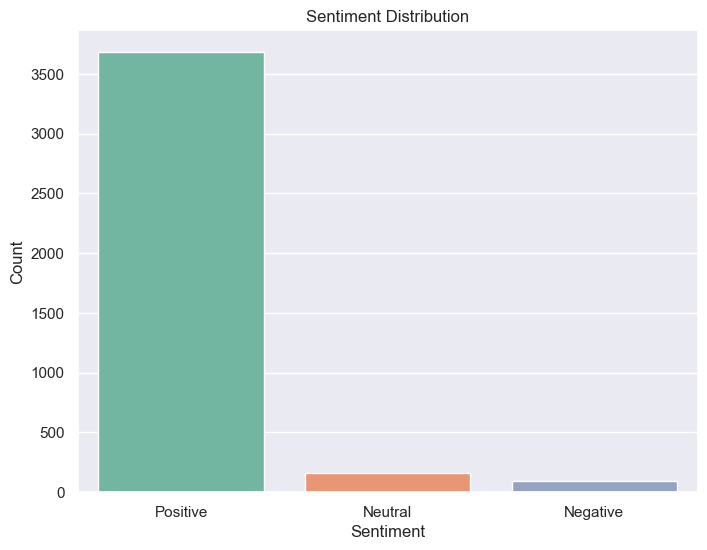

In [14]:
# Plot the sentiment distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=train_data, x='sentiment', palette='Set2')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

## Check Class Imbalance 

In [15]:
# Get the count of each sentiment category
class_counts = train_data['sentiment'].value_counts()
print(class_counts)

sentiment
Positive    3682
Neutral      158
Negative      90
Name: count, dtype: int64


In [16]:
# Calculate class imbalance percentage
class_percentage = train_data['sentiment'].value_counts(normalize=True) * 100
print(class_percentage)

sentiment
Positive    93.689567
Neutral      4.020356
Negative     2.290076
Name: proportion, dtype: float64


<Axes: ylabel='count'>

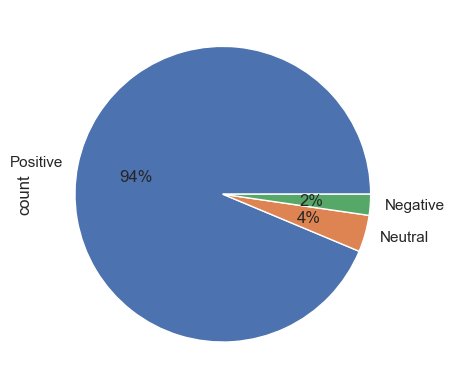

In [17]:
# Draw the Pie_plot 
train_data['sentiment'].value_counts().plot(kind='pie', autopct= '%1.0f%%')

## Bar Chart

In [18]:
# Textual Analysis for Common Words in Reviews
from sklearn.feature_extraction.text import CountVectorizer

# Create a CountVectorizer instance
vectorizer = CountVectorizer(stop_words='english', max_features=20)

# Fit and transform the reviews into a frequency matrix
X = vectorizer.fit_transform(train_data['reviews_text'])
word_freq = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

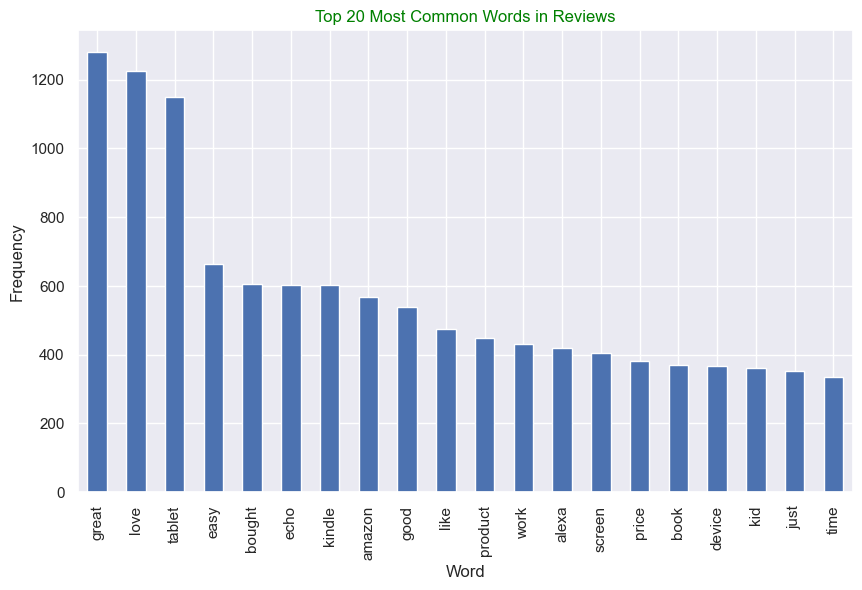

In [19]:
# Calculate word frequencies and plot the top 20 most common words
word_freq_sum = word_freq.sum(axis=0).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
word_freq_sum.head(20).plot(kind='bar')
plt.title('Top 20 Most Common Words in Reviews', color='green')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.show()

## Sentiment Distribution by Length of Review

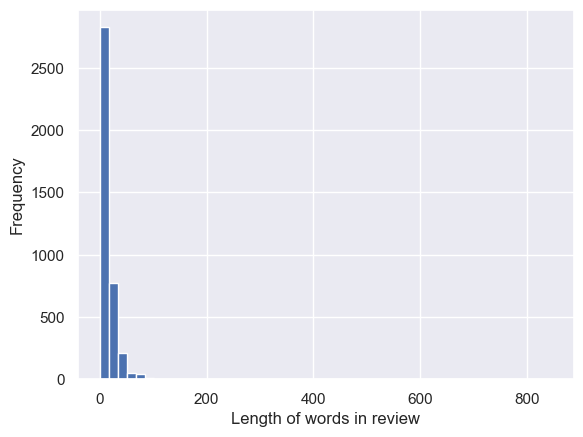

In [20]:
# Analysis of words in reviews
words_per_review = train_data["reviews_text"].apply(lambda x : len(x.split()))
words_per_review.hist(bins=50)
plt.xlabel('Length of words in review')
plt.ylabel("Frequency")
plt.show()

In [21]:
words_per_review.mean()

16.450127226463103

### Note

Each preprocessed review has an average of 19 words, and most of the reviews have less than 50 words.

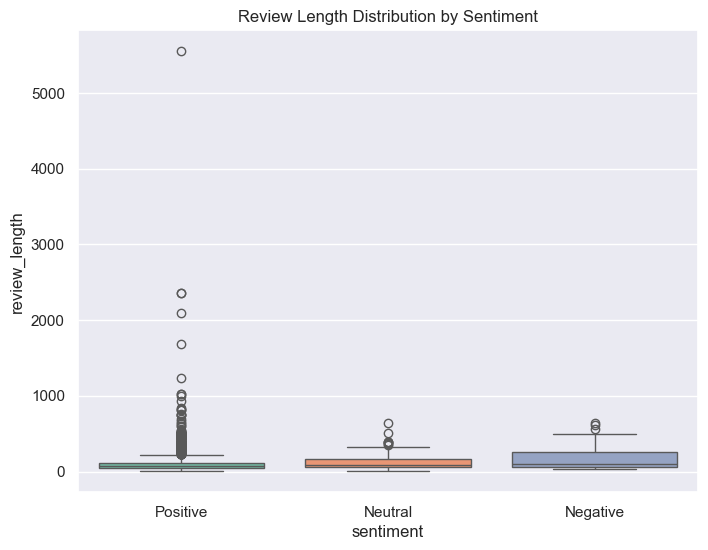

In [22]:
# Examine the distribution of review lengths for each sentiment category

# Create a new column for review length
train_data['review_length'] = train_data['reviews_text'].apply(len)

# Boxplot to show review length distribution by sentiment
plt.figure(figsize=(8, 6))
sns.boxplot(data=train_data, x='sentiment', y='review_length', palette='Set2')
plt.title('Review Length Distribution by Sentiment')
plt.show()

## Word Cloud Analysis

In [23]:
# Creating the word cloud for each sentiments  
positive_sentiments = train_data[train_data["sentiment"]=="Positive"]
negative_sentiments = train_data[train_data["sentiment"]=="Negative"]
neutral_sentiments= train_data[train_data["sentiment"]=="Neutral"]

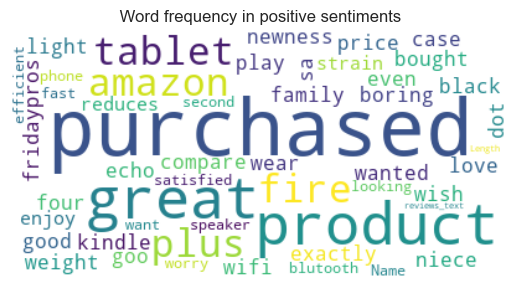

In [24]:
# Create a word cloud for positive reviews
word_cloud_text = positive_sentiments["reviews_text"]
wordcloud = WordCloud(max_words=50, background_color="white", relative_scaling = 1,).generate(str(word_cloud_text))

# Display the word cloud
plt.figure()
plt.imshow(wordcloud, interpolation= "bilinear")
plt.title(" Word frequency in positive sentiments")
plt.axis("off")
plt.show()

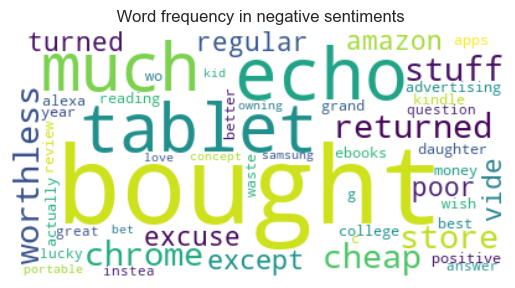

In [25]:
# Create a word cloud for Negative reviews
word_cloud_text = negative_sentiments["reviews_text"]
wordcloud = WordCloud(max_words=50, background_color="white", relative_scaling = 1,).generate(str(word_cloud_text))

# Display the word cloud
plt.figure()
plt.imshow(wordcloud, interpolation= "bilinear")
plt.title(" Word frequency in negative sentiments")
plt.axis("off")
plt.show()

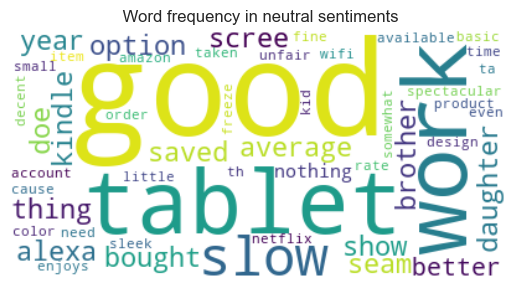

In [26]:
# Create a word cloud for Neutral reviews
word_cloud_text = neutral_sentiments["reviews_text"]
wordcloud = WordCloud(max_words=50, background_color="white", relative_scaling = 1,).generate(str(word_cloud_text))
                                           
# Display the word cloud
plt.figure()
plt.imshow(wordcloud, interpolation= "bilinear")
plt.title(" Word frequency in neutral sentiments")
plt.axis("off")
plt.show()

# Feature Engineering:

In [27]:
train_data.head(2)

,Name of the product,Product Brand,categories,primaryCategories,reviews_date,reviews_text,reviews_title,sentiment,reviews_day,reviews_month,reviews_year,review_length
0,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2016-12-26,purchased black fridaypros great price even sa...,powerful tablet,Positive,26,12,2016,306
1,Amazon - Echo Plus w/ Built-In Hub - Silver,Amazon,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware",2018-01-17,purchased amazon echo plus dot plus four fire ...,amazon echo plus awesome,Positive,17,1,2018,399


In [28]:
# Selecting columns necesary for sentiment analysis 
train_df = train_data[["reviews_text", "sentiment"]]
hidden_df = test_hidden_data[["reviews_text", "sentiment"]]

In [29]:
train_df.head(5)

,reviews_text,sentiment
0,purchased black fridaypros great price even sa...,Positive
1,purchased amazon echo plus dot plus four fire ...,Positive
2,just average alexa option doe show thing scree...,Neutral
3,very good product exactly what wanted very goo...,Positive
4,this purchased bought niece other case compare...,Positive


In [30]:
hidden_df.head(5)

,reviews_text,sentiment
0,amazon kindle fire free used that want online ...,Positive
1,echo show great addition amazon family work ju...,Positive
2,great value from best bought christmas sale,Positive
3,mine email facebook game line also have down l...,Positive
4,this fantastic item person bought love,Positive


## TF-IDF Vectorizer

In [31]:
# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000, ngram_range=(1, 2) )

# Transform the reviews text
X = tfidf_vectorizer.fit_transform(train_df['reviews_text'])
y = train_df['sentiment']

In [32]:
# Convert the result into DataFrame to view the features
tfidf_features = pd.DataFrame(X.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Display the few rows of features
tfidf_features.head()

,ability,able,able access,able change,able connect,able control,able download,able handle,able listen,able make,...,year working,year year,yesterday,young,young child,young kid,younger,youngest,youtube,youtube video
0,0.0,0.11557,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
# Add TF_IDF features into the dataset
train_tfidf = pd.concat([train_df.reset_index(drop=True),tfidf_features],axis=1)

# Show the few rows of dataset after adding features
train_tfidf.head(5)

,reviews_text,sentiment,ability,able,able access,able change,able connect,able control,able download,able handle,...,year working,year year,yesterday,young,young child,young kid,younger,youngest,youtube,youtube video
0,purchased black fridaypros great price even sa...,Positive,0.0,0.11557,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,purchased amazon echo plus dot plus four fire ...,Positive,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,just average alexa option doe show thing scree...,Neutral,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,very good product exactly what wanted very goo...,Positive,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,this purchased bought niece other case compare...,Positive,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Classifier Selection: Multinomial Naive Bayes

In [34]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [35]:
# Initialize the Naive Bayes classifier
mnb_classifier = MultinomialNB()

# Train the model
mnb_classifier.fit(X_train, y_train)

MultinomialNB()

In [36]:
# Predict model on the test set
y_pred = mnb_classifier.predict(X_test)

In [37]:
y_pred

array(['Positive', 'Positive', 'Positive', ..., 'Positive', 'Positive',
       'Positive'], dtype='<U8')

In [38]:
# Evaluate the model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9397794741306191
Classification Report:
               precision    recall  f1-score   support

    Negative       1.00      0.04      0.08        23
     Neutral       0.00      0.00      0.00        49
    Positive       0.94      1.00      0.97      1107

    accuracy                           0.94      1179
   macro avg       0.65      0.35      0.35      1179
weighted avg       0.90      0.94      0.91      1179



# Tackling Class Imbalance:

## Checking class counts_

In [39]:
class_counts = train_df['sentiment'].value_counts()
print(class_counts)

sentiment
Positive    3682
Neutral      158
Negative      90
Name: count, dtype: int64


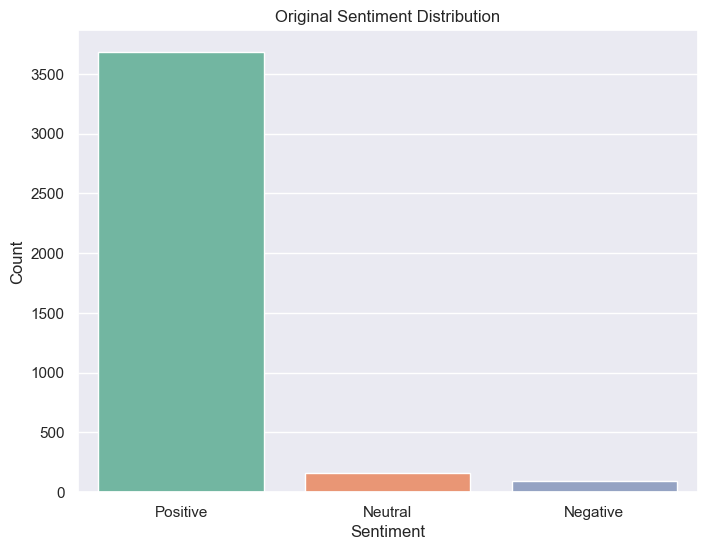

In [40]:
# Visualization original class sentiment distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=train_df, x='sentiment', palette='Set2')
plt.title('Original Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

## Applying SMOTE for Balancing Oversampling

In [41]:
# Initialize SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

In [42]:
# Apply SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

### Note
Smote algorithm is only applied to train data. The test data remain unchanged so that it represents the original data

In [43]:
y_train_resampled.value_counts()

sentiment
Positive    2575
Negative    2575
Neutral     2575
Name: count, dtype: int64

In [44]:
# Train the Naive Bayes classifier on the resampled data
mnb_classifier.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred_resampled = mnb_classifier.predict(X_test)

In [45]:
# Evaluate the model performance after SMOTE
print("Accuracy after SMOTE:", accuracy_score(y_test, y_pred_resampled))
print("Classification Report after SMOTE:\n", classification_report(y_test, y_pred_resampled))

Accuracy after SMOTE: 0.8490245971162002
Classification Report after SMOTE:
               precision    recall  f1-score   support

    Negative       0.17      0.48      0.25        23
     Neutral       0.17      0.37      0.23        49
    Positive       0.97      0.88      0.92      1107

    accuracy                           0.85      1179
   macro avg       0.43      0.57      0.47      1179
weighted avg       0.92      0.85      0.88      1179



### Observations
Balancing the dataset enabled all the three sentiments (positive, negative and neutral) to be predicted in the model

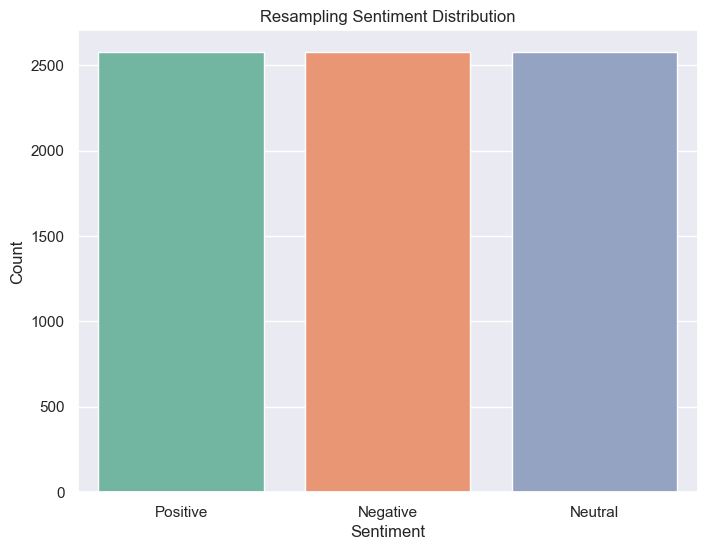

In [46]:
# Visualize the New distribution of sentiments after resampling
plt.figure(figsize=(8,6))
sns.countplot(x=y_train_resampled, palette='Set2')
plt.title('Resampling Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

## Undersampling

In [47]:
# Initialize undersampler
undersampler = RandomUnderSampler(random_state=42)

In [48]:
# Apply undersampling to the training data
X_train_under, y_train_under = undersampler.fit_resample(X_train, y_train)

In [49]:
y_train_under.value_counts()

sentiment
Negative    67
Neutral     67
Positive    67
Name: count, dtype: int64

In [50]:
# Train the Naive Bayes classifier on the undersampled data
mnb_classifier.fit(X_train_under, y_train_under)

# Predict on the test set
y_pred_under = mnb_classifier.predict(X_test)

In [51]:
# Evaluate the model performance after undersampling
print("Accuracy after Undersampling:", accuracy_score(y_test, y_pred_under))
print("Classification Report after Undersampling:\n", classification_report(y_test, y_pred_under))


Accuracy after Undersampling: 0.5691263782866837
Classification Report after Undersampling:
               precision    recall  f1-score   support

    Negative       0.07      0.57      0.12        23
     Neutral       0.08      0.55      0.14        49
    Positive       0.99      0.57      0.72      1107

    accuracy                           0.57      1179
   macro avg       0.38      0.56      0.33      1179
weighted avg       0.93      0.57      0.69      1179



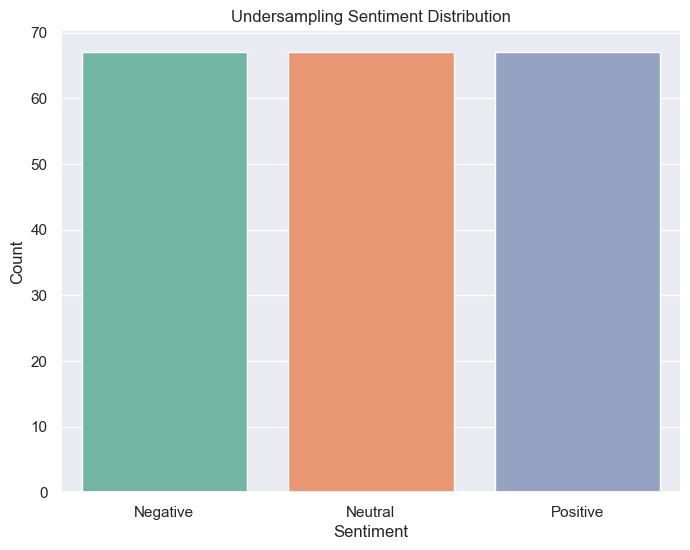

In [52]:
# Visualize the New distribution of sentiments after undersampling
plt.figure(figsize=(8,6))
sns.countplot(x=y_train_under, palette='Set2')
plt.title('Undersampling Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

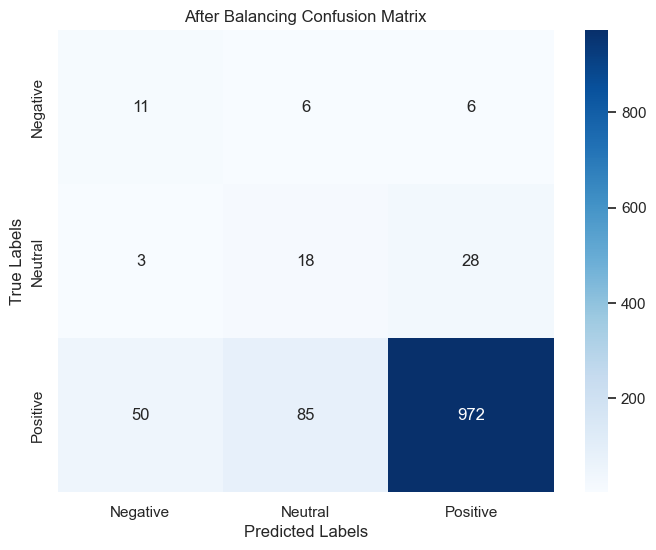

In [53]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_resampled)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('After Balancing Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Evaluation Metrics: Precision, Recall, F1-Score & AUC-ROC

In [54]:
# Calculate Precision, Recall & F1-Score
precision = precision_score(y_test, y_pred_resampled, average='weighted')
recall = recall_score(y_test, y_pred_resampled, average='weighted')
f1 = f1_score(y_test, y_pred_resampled, average='weighted')

In [55]:
# Display the results
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Precision: 0.9174
Recall: 0.8490
F1-Score: 0.8782


# AUC-ROC Curve

In [56]:
# Predict probabilities on the test set
y_prob = mnb_classifier.predict_proba(X_test)

In [57]:
# Compute AUC-ROC
auc = roc_auc_score(y_test, y_prob, multi_class='ovr')

# Display the AUC-ROC result
print(f"AUC-ROC: {auc:.4f}")

AUC-ROC: 0.7642


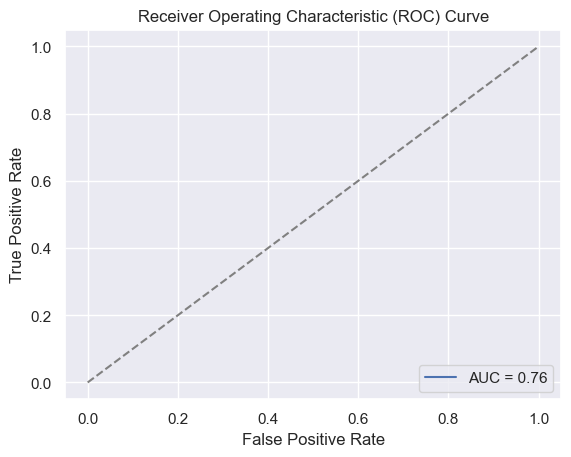

In [58]:
# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1], pos_label='positive')  
plt.plot(fpr, tpr, color='b', label='AUC = %0.2f' % auc)
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [59]:
# Binarize the labels for multi-class AUC
y_test_bin = label_binarize(y_test, classes=['Negative', 'Neutral', 'Positive'])  
classes = y_test_bin.shape[1]

In [60]:
from sklearn.metrics import roc_curve, auc

# Calculate the ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])  
    
# You can print or plot the results
for i in range(classes):
    print(f"Class {i+1} - AUC: {roc_auc[i]}")

Class 1 - AUC: 0.8149917255904919
Class 2 - AUC: 0.6442477876106195
Class 3 - AUC: 0.8334587975509383


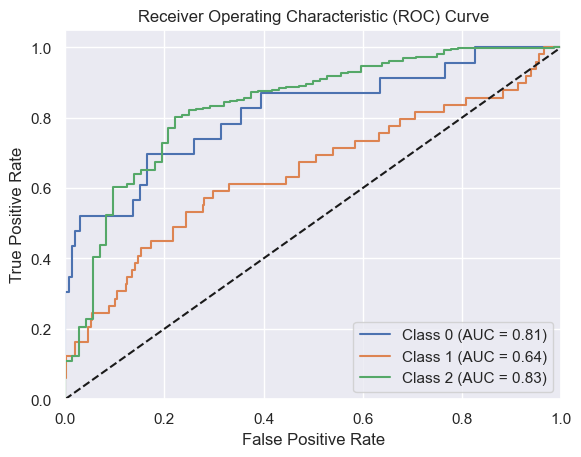

In [61]:
# Plot all the ROC curves
plt.figure()
for i in range(classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


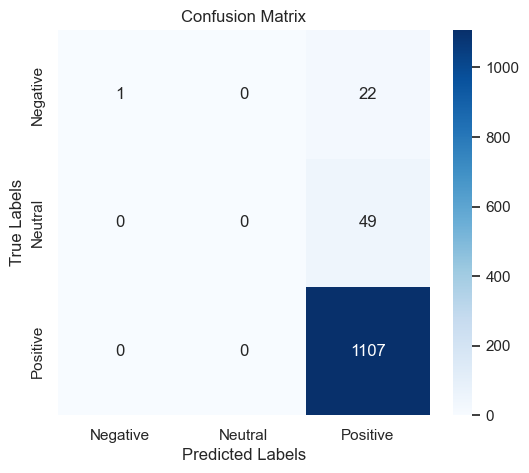

In [62]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
import seaborn as sns
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


# Week 3 & 4: Model Selection and Advanced Techniques

## Multi-class Support Vector Machines (SVM)

In [63]:
# Encoding target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Splitting dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

In [64]:
# Show the value of training & testing
print(f"Training:\n X = {X_train.shape}\n y = {y_train.shape}")
print(f"Testing:\n X = {X_test.shape}\n y = {y_test.shape}")

Training:
 X = (2751, 5000)
 y = (2751,)
Testing:
 X = (1179, 5000)
 y = (1179,)


In [65]:
# Initialize and train SVM Model
svm_classifier = SVC(kernel='linear', decision_function_shape='ovr')
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [66]:
# Predict and evaluate the SVM model
y_pred = svm_classifier.predict(X_test)

# Display the model classification performance
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

Accuracy: 0.9440203562340967
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.17      0.30        23
           1       1.00      0.04      0.08        49
           2       0.94      1.00      0.97      1107

    accuracy                           0.94      1179
   macro avg       0.98      0.40      0.45      1179
weighted avg       0.95      0.94      0.92      1179



## Neural Networks for Text Classification (Deep Learning)

In [67]:
# Build the Neural Network Model
nn_model = Sequential()
nn_model.add(Dense(128, activation='relu', input_dim=X_train.shape[1])) 
nn_model.add(Dropout(0.5))  
nn_model.add(Dense(64, activation='relu'))
nn_model.add(Dense(3, activation='softmax')) 

In [68]:
# Compile the model
nn_model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [69]:
# Train the model
history = nn_model.fit(X_train.toarray(), y_train, epochs=10, batch_size=32, validation_data=(X_test.toarray(), y_test))

Epoch 1/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.9109 - loss: 0.7103 - val_accuracy: 0.9389 - val_loss: 0.2481
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.9390 - loss: 0.2155 - val_accuracy: 0.9389 - val_loss: 0.2265
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9324 - loss: 0.1820 - val_accuracy: 0.9389 - val_loss: 0.2158
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9391 - loss: 0.1224 - val_accuracy: 0.9415 - val_loss: 0.2232
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9680 - loss: 0.0870 - val_accuracy: 0.9406 - val_loss: 0.2604
Epoch 6/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9889 - loss: 0.0476 - val_accuracy: 0.9381 - val_loss: 0.3005
Epoch 7/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9941 - loss: 0.0280 - val_accuracy: 0.9389 - val_loss: 0.3444
Epoch 8/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9972 - loss: 0.0148 - val_accuracy: 0.9406 - v

In [70]:
# Evaluate the model performance
nn_test_loss, nn_test_acc = nn_model.evaluate(X_test.toarray(), y_test)
print(f"Test accuracy: {nn_test_acc}")

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9365 - loss: 0.3557
Test accuracy: 0.9338422417640686


In [71]:
# Model summary
nn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │         640,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,945,739 (7.42 MB)

 Trainable params: 648,579 (2.47 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,297,160 (4.95 MB)

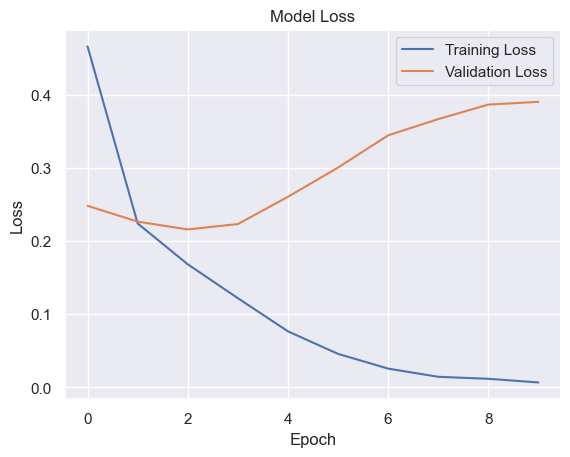

In [72]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Ensemble Techniques: XGBoost with Naive Bayes

In [73]:
# Apply SMOTE to balance class distribution
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train Naive Bayes
mnb_classifier = MultinomialNB()
mnb_classifier.fit(X_train_resampled, y_train_resampled)

MultinomialNB()

In [74]:
# Train XGBoost
xgb_classifier = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_classifier.fit(X_train_resampled, y_train_resampled)

# Predict and evaluate
y_pred = xgb_classifier.predict(X_test)
print(f"Accuracy with XGBoost: {accuracy_score(y_test, y_pred)}")

Accuracy with XGBoost: 0.9312977099236641


## Random Forest classifier with balanced data

In [75]:
# Model building Random Forest classifier
rcf_balanced_model = RandomForestClassifier()
rcf_balanced_model.fit(X_train_resampled.toarray(),y_train_resampled)

# Model performance 
train_rcf_accuracy = rcf_balanced_model.score(X_train_resampled.toarray(), y_train_resampled)
test_rcf_accuracy = rcf_balanced_model.score(X_test.toarray(), y_test)
print(f"Random forest train score for balanced dataset is {train_rcf_accuracy}, test score is {test_rcf_accuracy}")

Random forest train score for balanced dataset is 0.9998705501618123, test score is 0.9499575911789653


In [76]:
# Test prediction 
balanced_test_predictions = rcf_balanced_model.predict(X_test.toarray())
balanced_test_report = classification_report(y_test, balanced_test_predictions)
print('Test classification report\n', balanced_test_report)

Test classification report
               precision    recall  f1-score   support

           0       1.00      0.30      0.47        23
           1       1.00      0.12      0.22        49
           2       0.95      1.00      0.97      1107

    accuracy                           0.95      1179
   macro avg       0.98      0.48      0.55      1179
weighted avg       0.95      0.95      0.93      1179



# Advanced Feature Engineering: Sentiment Score

## Create Sentiment Score Feature using VADER

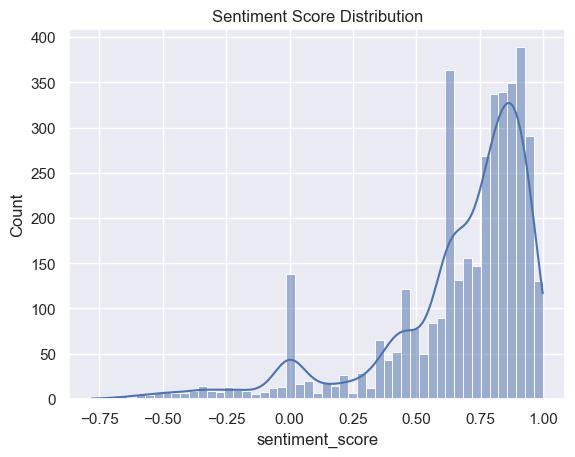

In [77]:
# Initialize the Sentiment Intensity Analyzer
sia = SentimentIntensityAnalyzer()

# Create a new feature column based on sentiment score
train_df['sentiment_score'] = train_df['reviews_text'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Visualize the sentiment score distribution
sns.histplot(train_df['sentiment_score'], kde=True)
plt.title('Sentiment Score Distribution')
plt.show()

## Integrate the sentiment score into feature set

In [78]:
# Add sentiment score as an additional feature
X_with_sentiment_score = X.copy().toarray()
X_with_sentiment_score = np.hstack((X_with_sentiment_score, train_df['sentiment_score'].values.reshape(-1, 1)))

In [79]:
# print the sentiment score
X_with_sentiment_score

array([[ 0.        ,  0.11556995,  0.        , ...,  0.        ,
         0.        ,  0.967     ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.9606    ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , -0.2263    ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.2732    ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.2903    ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.7328    ]])

# LSTM (Long Short-Term Memory) Implementation:

## Build  LSTM model using Keras

In [80]:
# Tokenize reviews
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(train_data['reviews_text'])
X_seq = tokenizer.texts_to_sequences(train_data['reviews_text'])
X_pad = pad_sequences(X_seq, maxlen=1000)

In [81]:
# Build LSTM Model
lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=5000, output_dim=128, input_length=100))
lstm_model.add(SpatialDropout1D(0.2))
lstm_model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
lstm_model.add(Dense(3, activation='softmax')) 

In [82]:
# Compile the LSTM model
lstm_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [83]:
# Train the model
lstm_history = lstm_model.fit(X_pad, y_encoded, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 312s 6s/step - accuracy: 0.8914 - loss: 0.5594 - val_accuracy: 0.9389 - val_loss: 0.2684
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 307s 6s/step - accuracy: 0.9389 - loss: 0.2626 - val_accuracy: 0.9389 - val_loss: 0.2607
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 318s 6s/step - accuracy: 0.9367 - loss: 0.2418 - val_accuracy: 0.9389 - val_loss: 0.2596
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 311s 6s/step - accuracy: 0.9443 - loss: 0.1720 - val_accuracy: 0.9377 - val_loss: 0.2443
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 312s 6s/step - accuracy: 0.9470 - loss: 0.1399 - val_accuracy: 0.9377 - val_loss: 0.2699


In [84]:
# Display LSTM model summary
lstm_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 1000, 128)           │         640,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout1d (SpatialDropout1D) │ (None, 1000, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 100)                 │          91,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │             303 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,195,711 (8.38 MB)

 Trainable params: 731,903 (2.79 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,463,808 (5.58 MB)

In [85]:
# Evaluate the model on the test set
lstm_test_loss, lstm_test_acc = lstm_model.evaluate(X_test, y_test)
print(f"LSTM Test Loss: {lstm_test_loss:.4f}")
print(f"LSTM Test Accuracy: {lstm_test_acc:.4f}")

37/37 ━━━━━━━━━━━━━━━━━━━━ 68s 2s/step - accuracy: 0.9434 - loss: 0.6390
LSTM Test Loss: 0.6410
LSTM Test Accuracy: 0.9389


# Model Comparison:

In [86]:
# Compare the accuracies of above models
svm_accuracy = accuracy_score(y_test, svm_classifier.predict(X_test))
nn_accuracy = nn_test_acc  
lstm_accuracy = lstm_test_acc  
RandomForestClassifier_accuracy = test_rcf_accuracy

# Display the model accuracies
print(f"SVM Accuracy: {svm_accuracy}")
print(f"Neural Network Accuracy: {nn_accuracy}")
print(f"LSTM Accuracy: {lstm_accuracy}")
print(f"Random Forest Classifier: {RandomForestClassifier_accuracy}")

SVM Accuracy: 0.9440203562340967
Neural Network Accuracy: 0.9338422417640686
LSTM Accuracy: 0.9389312863349915
Random Forest Classifier: 0.9499575911789653


# Optimization with Grid Search:

In [87]:
# Define the model
model = RandomForestClassifier()

# Define the parameter grid
param_grid = {
    'n_estimators': [10, 50, 100],  
    'max_depth': [2, 3, 5, 10, 20, 50, None] 
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5,  verbose=1)

In [88]:
# Fit the grid search to the data
grid_result = grid_search.fit(X_pad, y_encoded)

Fitting 5 folds for each of 21 candidates, totalling 105 fits


In [89]:
# Print the best parameters and best score
print("Best Parameters: ", grid_result.best_params_)
print("Best Score: ", grid_result.best_score_)

Best Parameters:  {'max_depth': 50, 'n_estimators': 50}
Best Score:  0.9463104325699746


In [90]:
# Display all results
for mean_score, params in zip(grid_result.cv_results_['mean_test_score'], grid_result.cv_results_['params']):
    print(f"Params: {params} | Mean Test Score: {mean_score}")

Params: {'max_depth': 2, 'n_estimators': 10} | Mean Test Score: 0.9368956743002546
Params: {'max_depth': 2, 'n_estimators': 50} | Mean Test Score: 0.9368956743002546
Params: {'max_depth': 2, 'n_estimators': 100} | Mean Test Score: 0.9368956743002546
Params: {'max_depth': 3, 'n_estimators': 10} | Mean Test Score: 0.9368956743002546
Params: {'max_depth': 3, 'n_estimators': 50} | Mean Test Score: 0.9371501272264633
Params: {'max_depth': 3, 'n_estimators': 100} | Mean Test Score: 0.9368956743002546
Params: {'max_depth': 5, 'n_estimators': 10} | Mean Test Score: 0.9371501272264633
Params: {'max_depth': 5, 'n_estimators': 50} | Mean Test Score: 0.9376590330788804
Params: {'max_depth': 5, 'n_estimators': 100} | Mean Test Score: 0.9371501272264633
Params: {'max_depth': 10, 'n_estimators': 10} | Mean Test Score: 0.9402035623409668
Params: {'max_depth': 10, 'n_estimators': 50} | Mean Test Score: 0.9399491094147583
Params: {'max_depth': 10, 'n_estimators': 100} | Mean Test Score: 0.94020356234096

# Topic Modeling with LDA (Latent Dirichlet Allocation):

In [91]:
# Vectorize the reviews using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_tfidf = vectorizer.fit_transform(train_df['reviews_text'])

# Apply LDA
lda = LatentDirichletAllocation(n_components=3, random_state=42) 
lda.fit(X_tfidf)

# Extract top words for each topic
def get_top_words_from_lda(model, feature_names, n_top_words):
    top_words = {}
    for topic_idx, topic in enumerate(model.components_):
        top_words[topic_idx] = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
    return top_words

In [92]:
# Display top 50 words for each topic
n_top_words = 50
top_words_lda = get_top_words_from_lda(lda, vectorizer.get_feature_names_out(), n_top_words)
print(top_words_lda)

{0: ['tablet', 'love', 'great', 'easy', 'price', 'bought', 'kindle', 'game', 'good', 'year', 'kid', 'apps', 'work', 'daughter', 'product', 'book', 'grandson', 'reading', 'need', 'perfect', 'doe', 'play', 'size', 'like', 'read', 'time', 'little', 'ipad', 'recommend', 'just', 'gift', 'fast', 'purchased', 'movie', 'case', 'want', 'amazon', 'watch', 'wanted', 'learning', 'really', 'wife', 'quality', 'best', 'screen', 'granddaughter', 'purchase', 'absolutely', 'download', 'playing'], 1: ['love', 'gift', 'easy', 'bought', 'christmas', 'great', 'tablet', 'kid', 'product', 'purchased', 'amazon', 'happy', 'recommend', 'child', 'device', 'kindle', 'year', 'best', 'friend', 'user', 'friendly', 'good', 'like', 'definitely', 'family', 'really', 'small', 'value', 'loved', 'control', 'nice', 'price', 'perfect', 'parental', 'wife', 'daughter', 'excellent', 'used', 'just', 'enjoying', 'parent', 'thing', 'item', 'mother', 'reader', 'grand', 'better', 'learning', 'present', 'screen'], 2: ['echo', 'alexa'

### Create Word Cloud for LDA

Topic 1 Word Cloud:


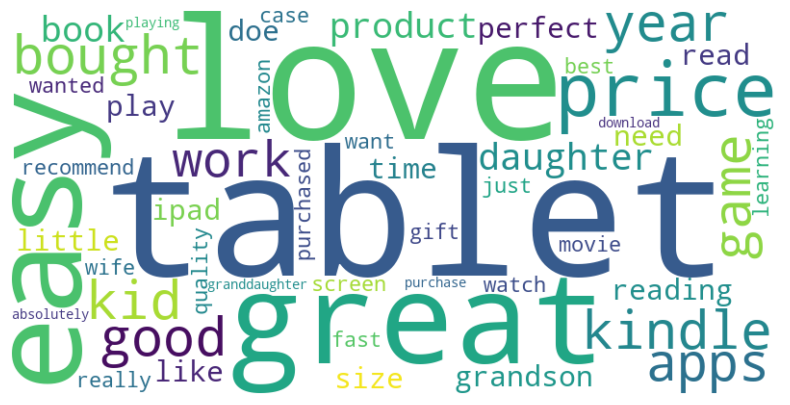

Topic 2 Word Cloud:


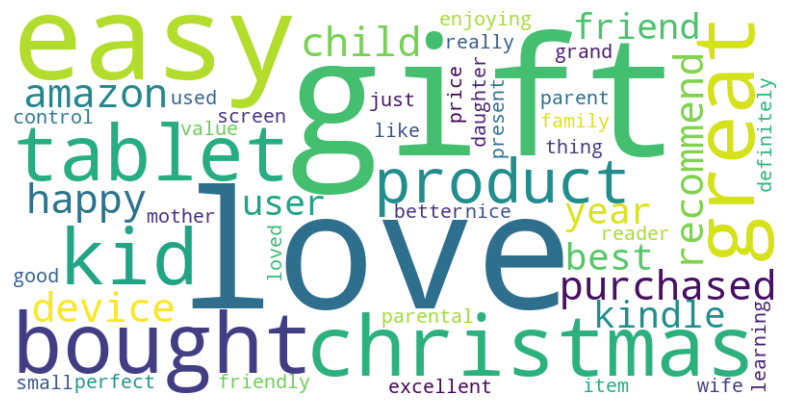

Topic 3 Word Cloud:


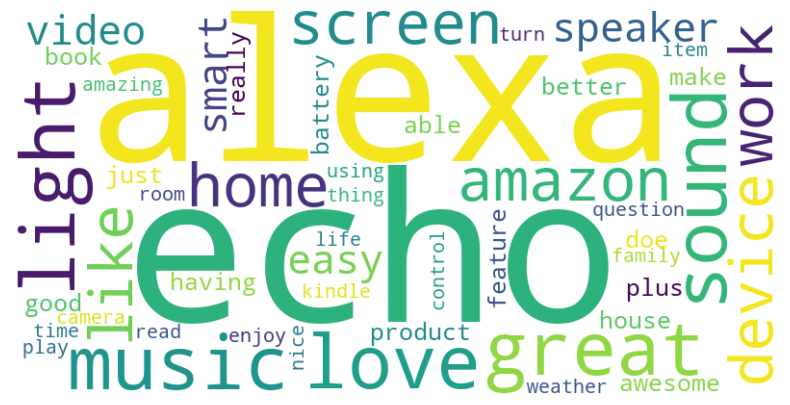

In [93]:
def create_word_cloud(words):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(words)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Show word cloud 
for topic_idx, words in top_words_lda.items():
    word_freq = {word: 1 for word in words}  
    print(f"Topic {topic_idx +1 } Word Cloud:")
    create_word_cloud(word_freq)

## Topic Modeling with NMF (Non-Negative Matrix Factorization)

In [94]:
# Apply NMF
nmf = NMF(n_components=3, random_state=42)
nmf.fit(X_tfidf)

# Extract top words for each NMF topic
def get_top_words_from_nmf(model, feature_names, n_top_words):
    top_words = {}
    for topic_idx, topic in enumerate(model.components_):
        top_words[topic_idx] = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
    return top_words

In [95]:
# Display top 10 words for each topic
top_words_nmf = get_top_words_from_nmf(nmf, vectorizer.get_feature_names_out(), n_top_words)
print(top_words_nmf)

{0: ['great', 'tablet', 'price', 'product', 'good', 'work', 'easy', 'kid', 'recommend', 'apps', 'reading', 'need', 'little', 'amazon', 'game', 'child', 'perfect', 'quality', 'battery', 'best', 'fast', 'size', 'doe', 'value', 'like', 'nice', 'time', 'purchase', 'book', 'picture', 'sound', 'feature', 'kindle', 'just', 'really', 'play', 'life', 'movie', 'awesome', 'highly', 'beat', 'definitely', 'learning', 'color', 'ipad', 'screen', 'user', 'happy', 'money', 'friendly'], 1: ['love', 'bought', 'year', 'easy', 'kindle', 'daughter', 'gift', 'grandson', 'christmas', 'game', 'purchased', 'tablet', 'kid', 'book', 'granddaughter', 'wife', 'play', 'absolutely', 'read', 'perfect', 'birthday', 'niece', 'loved', 'thing', 'size', 'mother', 'second', 'just', 'nephew', 'apps', 'grand', 'time', 'durable', 'watch', 'playing', 'present', 'awesome', 'reading', 'navigate', 'kindles', 'case', 'happy', 'educational', 'reader', 'child', 'really', 'learning', 'husband', 'family', 'friendly'], 2: ['echo', 'alex

### Create Word Cloud for NMF Topics

Topic 1 Word Cloud:


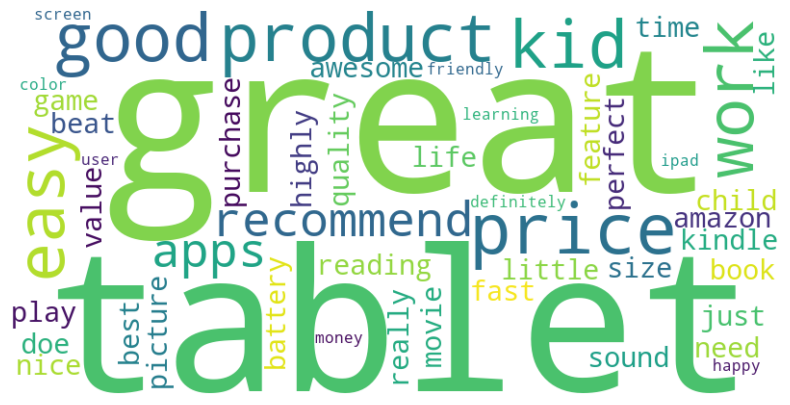

Topic 2 Word Cloud:


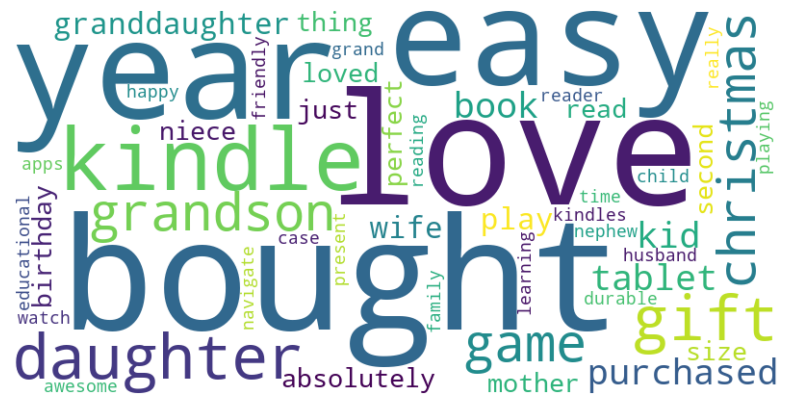

Topic 3 Word Cloud:


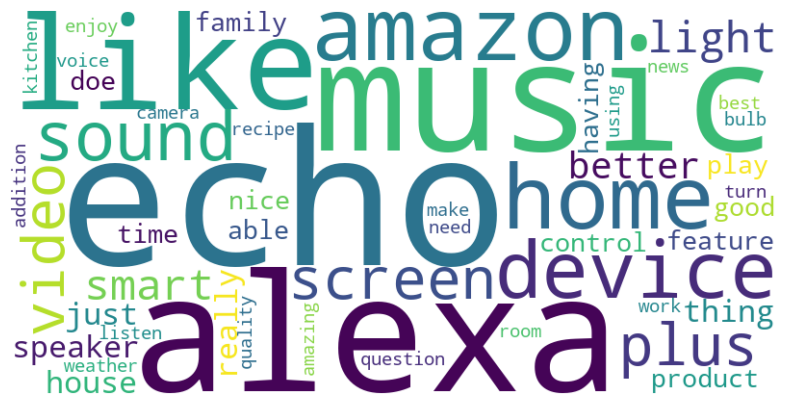

In [96]:
for topic_idx, words in top_words_nmf.items():
    word_freq = {word: 1 for word in words}  # Assign equal frequency for simplicity
    print(f"Topic {topic_idx + 1} Word Cloud:")
    create_word_cloud(word_freq)